# Figure 5

In [7]:
# Load Function Definitions 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import roc_curve, auc

font = {'size'   : 8}
matplotlib.rc('font', **font)

from logistic_regression_sonia import Logistic_Sonia_LeftRight, Binary_Data
from scattering import density_scatterplot
from standards import *

colors = ['#08457e', '#32c6a6',  '#ffa600', '#ffff66']
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors)

DataPath = "CA-scatterplots"
OutPath = "Graphs"

# Length selection example

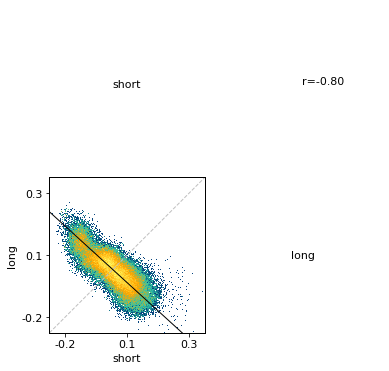

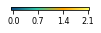

In [6]:
cross_df = {}
for feat in ["short", "long"] :
    df = pd.read_csv( f"{DataPath}/{feat}-eval.csv.gz", compression="gzip")
    cross_df[ feat ] =  - np.log10( df["Q"] )
    
from matplotlib.colors import LinearSegmentedColormap
colors = ['#08457e', '#32c6a6',  '#ffa600', '#ffff66']
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors)

ord_df = pd.DataFrame( cross_df )
# plot density scatter plot matrix
axes, im = density_scatterplot( ord_df, hist=False, density=True, show_matrix='lower',
                        density_logscale=True, figsize=(6,6), fontsize=11, orientation="black", 
                        Pearson=False, my_cmap=cmap2 )

# note down pearson
from scipy.stats import pearsonr
r, _ = pearsonr(ord_df[ord_df.columns[0]],ord_df[ord_df.columns[1]])
axes.flat[2].text(0.5, 0.5, f"r={r:.2f}", transform=axes.flat[1].transAxes)

plt.savefig( f"{OutPath}/fig5A.pdf", bbox_inches='tight',dpi=300 ) 

fig2, cbar_axes = plt.subplots(figsize=(1.4, 0.05))
cbar = fig2.colorbar(im, cax=cbar_axes, ticks=[0, 0.7, 1.4, 2.1], orientation="horizontal")
cbar.ax.tick_params(labelsize=8)

plt.savefig( f"{OutPath}/fig5A-cbar.pdf", bbox_inches='tight',dpi=300 ) 

plt.show()

# Hydrophobic selection example

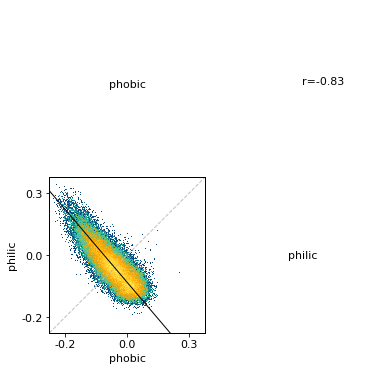

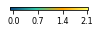

In [9]:
cross_df = {}
for feat in [ "phobic", "philic" ] :
    df = pd.read_csv( f"{DataPath}/{feat}-eval.csv.gz", compression="gzip")
    cross_df[ feat ] =  - np.log10( df["Q"] )

ord_df = pd.DataFrame( cross_df )
# plot density scatter plot matrix
axes, im = density_scatterplot( ord_df, hist=False, density=True, show_matrix='lower',
                        density_logscale=True, figsize=(6,6), fontsize=11, orientation="black", 
                        Pearson=False, my_cmap=cmap2 )

# note down pearson
r, _ = pearsonr(ord_df[ord_df.columns[0]],ord_df[ord_df.columns[1]])
axes.flat[2].text(0.5, 0.5, f"r={r:.2f}", transform=axes.flat[1].transAxes)

plt.savefig( f"{OutPath}/fig5B.pdf", bbox_inches='tight',dpi=300 ) 

fig2, cbar_axes = plt.subplots(figsize=(1.4, 0.05))
cbar = fig2.colorbar(im, cax=cbar_axes, ticks=[0, 0.7, 1.4, 2.1], orientation="horizontal")
cbar.ax.tick_params(labelsize=8)

plt.savefig( f"{OutPath}/fig5B-cbar.pdf", bbox_inches='tight',dpi=300 ) 

plt.show()

## Final Scatterplot

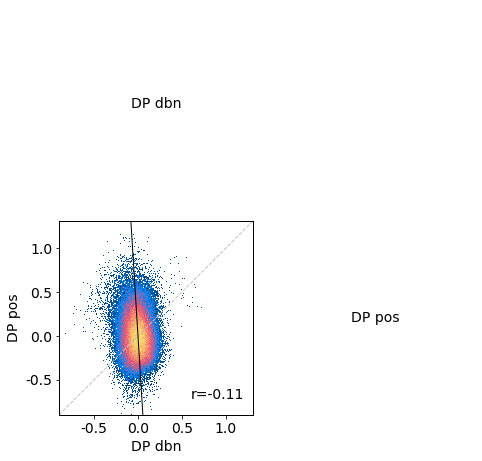

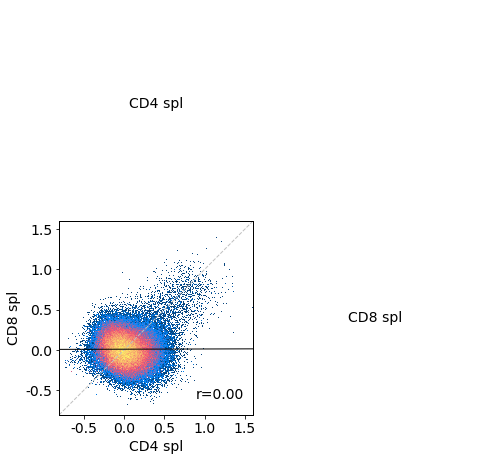

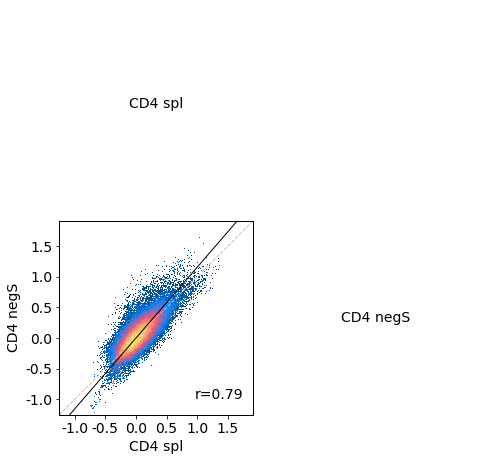

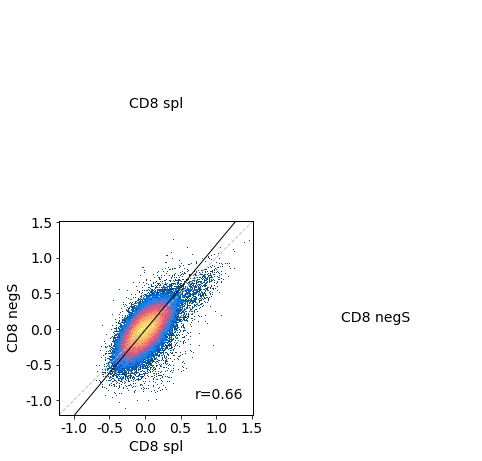

In [12]:
# >>>>>>>>>>>
#  OPTIONS  #
# >>>>>>>>>>>

PLOT_CONTROL = {}
PLOT_CONTROL["C"] = {
    "set_ticks" : np.arange(-0.5, 1.5, 0.5),
    "cc_sel_indx" : 0,
    "CC_VEC_sel" : ['DP_DBN', 'DP_pos'],
}
PLOT_CONTROL["D"] = {
    "set_ticks" : np.arange(-0.5, 2, 0.5),
    "cc_sel_indx" : 2,
    "CC_VEC_sel" : ['CD4_spl', 'CD8_spl'],
}
PLOT_CONTROL["E"] = {
    "set_ticks" : np.arange(-1, 2, 0.5),
    "cc_sel_indx" : 2,
    "CC_VEC_sel" : ['CD4_spl', 'CD4_negS'],
}
PLOT_CONTROL["F"] = {
    "set_ticks" : np.arange(-1, 2, 0.5),
    "cc_sel_indx" : 2,
    "CC_VEC_sel" : ['CD8_spl', 'CD8_negS'],
}

for letter in PLOT_CONTROL :
    set_ticks = PLOT_CONTROL[letter]["set_ticks"]
    cc_sel_indx = PLOT_CONTROL[letter]["cc_sel_indx"]
    CC_VEC_sel = PLOT_CONTROL[letter]["CC_VEC_sel"]

    Selected_cc = CC_VEC[cc_sel_indx]
    if Selected_cc in CC_VEC_sel : CC_VEC_sel.remove(Selected_cc)
    tmp = 2.5 * ( len(CC_VEC_sel) + 1 )
    figsize = ( tmp, tmp )

    HEADERS_sel = [CC_to_HEAD[cc] for cc in CC_VEC_sel]
    FILEOUT_TAG = f"Q_scatter_{('-').join(CC_VEC_sel)}_to_{Selected_cc}"

    #############################
    #  load dataframe of loqQ  #
    #############################

    PathToFile = f"{DataPath}/pre-eval_by-{Selected_cc}-CA-prod.csv.gz"
    df = pd.read_csv( PathToFile, header=0 )
    Q_sel = df['Q'].values

    cross_df = {}    
    for cc,hh in zip(CC_VEC_sel, HEADERS_sel) : 
        PathToFile = f"{DataPath}/pre-eval_by-{cc}-CA-prod.csv.gz"
        try :
            Q_cc = pd.read_csv( PathToFile, header=0 )['Q'].values
            cross_df[ hh ] = - np.log10( np.divide( Q_cc, Q_sel )  )
        except :
            print( "Impossible to open file: %s" % PathToFile )

    # convert to pandas dataframe
    ord_df = pd.DataFrame( cross_df )

    # plot density scatter plot matrix
    axes, im = density_scatterplot( ord_df, hist=False, density=True, show_matrix='lower',
                            density_logscale=True, figsize=figsize, orientation="black",
                                Pearson=True, set_ticks=set_ticks, fontsize=14 )

    plt.savefig( f"{OutPath}/fig5{letter}.pdf", bbox_inches='tight',dpi=300 ) 
        